In [1]:
from tensorflow.keras.models import model_from_json
from convert_data import Idx

import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
import imageio

from sklearn.preprocessing import StandardScaler

C:\Users\Carsten\Anaconda3\envs\openCV3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Carsten\Anaconda3\envs\openCV3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Carsten\Anaconda3\envs\openCV3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Carsten\Anaconda3\envs\openCV3\lib\site-packages\ten

In [2]:
model_path = "./model/model.json"
weights_path = "./model/model.h5"

# Load the model from file
model_file = open(model_path, 'r')
model = model_file.read()
model = model_from_json(model)
model_file.close()

# Load the weights from file and add them to the model
model.load_weights(weights_path)
print("Model and weights loaded")

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W0817 00:26:04.125077 16408 deprecation.py:506] From C:\Users\Carsten\Anaconda3\envs\openCV3\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0817 00:26:04.126074 16408 deprecation.py:506] From C:\Users\Carsten\Anaconda3\envs\openCV3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0817 00:26:04.127071 16408 deprecation.py:506] From C:\Users\Carsten\Anaconda3\envs\openCV3\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.pyt

Model and weights loaded


In [3]:
# Read the data 
dataset_test = './development/dataset_test/'
filename = '{}images.idx3-ubyte'.format(dataset_test)
test_images = Idx.load_idx(filename)

# Read the labels
filename = '{}labels.idx3-ubyte'.format(dataset_test)
test_labels = Idx.load_labels(filename)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Magic number: (0, 0, 8, 3)
Magic number: (0, 0, 8, 1)
4947/4947 [==============================] - 1s 158us/sample - loss: 12.4926 - acc: 0.9826
Test accuracy: 0.9826157


In [4]:
imageFile = './images/new_images/20190729_225924.jpg' #Characters_01
#imageFile = './images/20180628_215027.jpg' #Characters_04

conv_size = [80, 80]
class_names = ['2', '5', '6', '8', 'a', 'A', 'b', 'B', 'c', 'ch', 'ck', 'd', 'D', 
               'e', 'E', 'f', 'F', 'g', 'G', 'h', 'i', 'k', 'K', 'l', 'm', 'M', 'n', 'N', 'o', 
               'p', 'P', 'r', 's', 'S', 't', 'T', 'tz', 'u', 'v', 'w', 'W', 'z', 'Z', 'ß']

# Read image
imRaw = cv2.imread(imageFile)
imCopy = imRaw.copy()

gray = cv2.cvtColor(imCopy, cv2.COLOR_BGR2GRAY)

th3 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
        cv2.THRESH_BINARY, 11, 2)

th3 = cv2.medianBlur(th3, 3)

# Find contours
im2, ctrs, hier = cv2.findContours(th3.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])

# Add bounding boxes
n = 0
nChar = np.shape(sorted_ctrs)[0]

all_ratios = []
for i in range(nChar):
    
    # Draw the bounding box
    x, y, w, h = cv2.boundingRect(sorted_ctrs[i])
    ratio = np.min([h, w])/np.max([h, w])
    if  (w * h) > 400 and (w * h) < 20000 and ratio < 0.8:
        roi = gray[y:y+h, x:x+w]
        roi = cv2.resize(roi, (conv_size[0], conv_size[1]))
        roi = roi.reshape(1, conv_size[0], conv_size[1])
        roi = 255 - roi 

        prediction = model.predict(roi)
        
        all_ratios.append(ratio)
        
        if prediction.max() > 0.9:
            char = class_names[prediction.argmax()]

            imRaw = cv2.putText(
                imRaw, #numpy array on which text is written
                char, #text
                (x, y), #position at which writing has to start
                cv2.FONT_HERSHEY_SIMPLEX, #font family
                1, #font size
                (209, 80, 0, 255), #font color
                5) #font stroke

cv2.imwrite('output.png', imRaw)

True

(array([  5.,   4.,   7.,  13.,  39.,  34.,  48.,  42., 102.,  76.,  75.,
         96., 102., 108., 129., 130., 133., 124., 100.,  98.,  75.,  77.,
         67.,  59.,  69.,  72.,  90., 118.,  79., 133., 111.,  73.,  99.,
         76.,  48.,  48.,  49.,  37.,  44.,  42.,  30.,  57.,  29.,  32.,
         44.,  27.,  41.,  16.,  54.,  31.]),
 array([0.20408163, 0.22      , 0.23591837, 0.25183673, 0.2677551 ,
        0.28367347, 0.29959184, 0.3155102 , 0.33142857, 0.34734694,
        0.36326531, 0.37918367, 0.39510204, 0.41102041, 0.42693878,
        0.44285714, 0.45877551, 0.47469388, 0.49061224, 0.50653061,
        0.52244898, 0.53836735, 0.55428571, 0.57020408, 0.58612245,
        0.60204082, 0.61795918, 0.63387755, 0.64979592, 0.66571429,
        0.68163265, 0.69755102, 0.71346939, 0.72938776, 0.74530612,
        0.76122449, 0.77714286, 0.79306122, 0.80897959, 0.82489796,
        0.84081633, 0.85673469, 0.87265306, 0.88857143, 0.9044898 ,
        0.92040816, 0.93632653, 0.9522449 , 0.

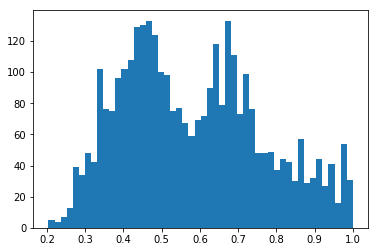

In [8]:
plt.hist(all_ratios, 50)

In [20]:
h

1

In [7]:
# Turn camera on
cap = cv2.VideoCapture(0)

In [6]:
conv_size = [80, 80]
class_names = ['2', '5', '6', '8', 'a', 'A', 'b', 'B', 'c', 'ch', 'ck', 'd', 'D', 
               'e', 'E', 'f', 'F', 'g', 'G', 'h', 'i', 'k', 'K', 'l', 'm', 'M', 'n', 'N', 'o', 
               'p', 'P', 'r', 's', 'S', 't', 'T', 'tz', 'u', 'v', 'w', 'W', 'z', 'Z', 'ß']
while(1):
    # Take each frame
    _, frame = cap.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    th3 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY, 11, 4)
    
    th3 = cv2.medianBlur(th3, 3)
    
    # Find contours
    im2, ctrs, hier = cv2.findContours(th3.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    # Sort contours
    sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    
    # Add bounding boxes
    n = 0
    nChar = np.shape(sorted_ctrs)[0]
    for i in range(nChar):
        # Draw the bounding box
        x, y, w, h = cv2.boundingRect(sorted_ctrs[i])
        if (w * h) > 300 and (w * h) < 20000:
            
            roi = gray[y:y+h, x:x+w]
            roi = cv2.resize(roi, (conv_size[0], conv_size[1]))
            roi = roi.reshape(1, conv_size[0], conv_size[1])
            roi = 255 - roi 
            
            prediction = model.predict(roi)
        
            if prediction.max() > 0.9:
                char = class_names[prediction.argmax()]

                im = cv2.putText(
                    frame, #numpy array on which text is written
                    char, #text
                    (x, y), #position at which writing has to start
                    cv2.FONT_HERSHEY_SIMPLEX, #font family
                    0.5, #font size
                    (209, 80, 0, 255), #font color
                    2) #font stroke

            n += 1
    
    try:
        cv2.imshow('frame', frame)
        cv2.imshow('binary', th3)
    except:
        cv2.imshow('frame', th3)
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
